In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
import math
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt 

In [2]:
courses = pd.read_csv('C:/Users/gabriel/Desktop/data/anonimized_courses.csv')
logs = pd.read_csv('C:/Users/gabriel/Desktop/data/anonimized_logs.csv')
regs = pd.read_csv('C:/Users/gabriel/Desktop/data/anonimized_registrations.csv')
sections = pd.read_csv('C:/Users/gabriel/Desktop/data/anonimized_sections.csv')
tasks = pd.read_csv('C:/Users/gabriel/Desktop/data/anonimized_tasks.csv')
users = pd.read_csv('C:/Users/gabriel/Desktop/data/anonimized_users.csv')

In [3]:
users.head()

,createdAt,special_flagged,uuid
0,2011-08-03,0,97665
1,2011-08-11,0,68492
2,2011-08-03,0,52463
3,2011-08-19,0,129570
4,2011-08-04,0,45524


In [4]:
courses.head()

,createdAt,level,publicatedAt,totalVideoTime,subCategory_id,situation,isProject,removedAt,uuid,substitute_uuid
0,2011-09-22,1,2011-09-22,51,30,PUBLISHED,0,NaN,588,NaN
1,2011-10-27,5,2011-10-27,72,21,PUBLISHED,0,NaN,840,NaN
2,2012-02-15,1,2012-02-15,112,1,PUBLISHED,0,NaN,764,NaN
3,2012-03-07,5,2012-03-07,83,21,PUBLISHED,0,NaN,720,NaN
4,2012-05-29,1,2012-05-29,70,48,PUBLISHED,0,NaN,937,NaN


In [5]:
logs.head()

,user_uuid,moment,kind,iterable_uuid
0,57928,2016-09-12,EXERCISE_ANSWERED,2918d775-73e8-4c33-a3b7-5f0726bbe3ca
1,73719,2016-09-12,EXERCISE_ANSWERED,1315cdde-14e1-412d-bc3b-5da04b7aa44a
2,38957,2016-09-12,EXERCISE_ANSWERED,2ec53649-0eae-4114-b21f-ad72d448180b
3,59788,2016-09-12,EXERCISE_ANSWERED,ad5ae7b6-918f-4dfe-8680-db2928fe732c
4,73719,2016-09-12,EXERCISE_ANSWERED,7e08ee37-3eb6-4412-a6dd-d01f5619d2a2


In [6]:
sections.head()

,number,active,uuid,course_uuid
0,1,1,3988,588
1,2,1,6725,588
2,3,1,3716,588
3,4,1,4125,588
4,5,1,5354,588


In [7]:
regs.head()

,user_uuid,course_uuid,createdAt,finishedAt,lastAccessDate,currentState
0,36802,113,2015-09-15 06:33:25,2015-09-28 21:54:56,2017-11-28 16:22:04,IN_PROGRESS
1,34892,764,2015-09-15 00:00:21,2016-03-01 14:11:05,2016-10-18 13:15:22,IN_PROGRESS
2,37440,764,2015-09-15 00:00:21,NaN,2015-09-15 00:00:21,IN_PROGRESS
3,58529,76,2015-09-15 00:00:20,NaN,2018-03-14 20:27:27,NOT_VISIBLE
4,48059,76,2015-09-15 00:00:20,NaN,2015-09-15 00:00:20,IN_PROGRESS


In [8]:
tasks.head()

,kind,duration,status,createdAt,uuid,course_uuid
0,VIDEO,31,ACTIVE,2015-10-21,21316,588
1,VIDEO,188,ACTIVE,2015-10-21,13646,588
2,HQ_EXPLANATION,0,ACTIVE,2015-10-21,45401,588
3,OPEN_QUESTION,0,ACTIVE,2015-10-21,37691,588
4,OPEN_QUESTION,0,ACTIVE,2015-10-21,9310,588


In [9]:
tasks['kind'].value_counts()

VIDEO              16366
SINGLE_CHOICE       9138
HQ_EXPLANATION      8853
TEXT_CONTENT        6599
OPEN_QUESTION       3075
MULTIPLE_CHOICE     1439
EXTRA_CONTENT          1
Name: kind, dtype: int64

In [10]:
logs['kind'].value_counts()

EXERCISE_ANSWERED      18000612
COURSE_FINISHED          426290
FORUM_POSTED              67213
FORUM_SOLVED              13963
CAREER_FINISHED           12514
DEGREE_FINISHED            9247
SUGGESTION_APPROVED        3558
PROJECT_APPROVED             74
Name: kind, dtype: int64

Análise dos alunos que interagem com a plataforma (através dos foruns):

In [11]:
logsForum = logs.copy()
logsForum.drop(['iterable_uuid'],axis=1,inplace=True)

logsForum = logsForum[logsForum.kind!='COURSE_FINISHED']
logsForum = logsForum[logsForum.kind!='CAREER_FINISHED']
logsForum = logsForum[logsForum.kind!='DEGREE_FINISHED']
logsForum = logsForum[logsForum.kind!='PROJECT_APPROVED']
logsForum = logsForum[logsForum.kind!='EXERCISE_ANSWERED']

logsForum['somaForum'] = logsForum.groupby(['user_uuid','moment'])['kind'].transform('count')
logsForum.drop_duplicates(subset=['user_uuid','moment'],inplace=True)
logsForum.drop(['kind'],axis=1,inplace=True)

logsForum.head()

,user_uuid,moment,somaForum
526,13258,2016-09-12,4
1010,119614,2016-09-12,2
1029,86326,2016-09-12,2
1755,85621,2016-09-12,1
1873,82046,2016-09-12,1


In [12]:
logsEx = logs[logs['user_uuid'].isin(logsForum['user_uuid'])]

logsEx = logsEx[logsEx.kind!='FORUM_SOLVED']
logsEx = logsEx[logsEx.kind!='FORUM_POSTED']
logsEx = logsEx[logsEx.kind!='SUGGESTION_APPROVED']

logsEx.drop(['iterable_uuid'],axis=1,inplace=True)
logsEx['somaEx'] = logsEx.groupby(['user_uuid','moment'])['kind'].transform('count')
logsEx.drop_duplicates(subset=['user_uuid','moment'],inplace=True)
logsEx.drop(['kind'],axis=1,inplace=True)
logsEx.head()

,user_uuid,moment,somaEx
0,57928,2016-09-12,47
2,38957,2016-09-12,2
16,117109,2016-09-12,3
20,88787,2016-09-12,3
21,16502,2016-09-12,11


In [13]:
teste = logsForum.merge(logsEx, left_on=['user_uuid','moment'], right_on=['user_uuid','moment'])
teste = teste[(teste['somaEx'] < 300)]
teste.head()

,user_uuid,moment,somaForum,somaEx
0,13258,2016-09-12,4,1
1,119614,2016-09-12,2,4
2,82046,2016-09-12,1,42
3,86063,2016-09-12,1,11
4,102848,2016-09-12,1,3


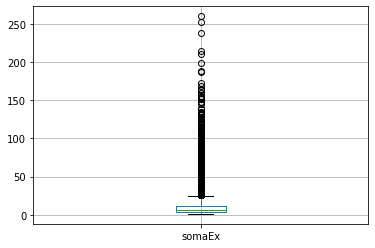

In [14]:
teste.boxplot(column='somaEx', return_type='axes')

In [15]:
teste['somaEx'].describe()

count    24059.000000
mean         9.953074
std         12.904675
min          1.000000
25%          3.000000
50%          6.000000
75%         12.000000
max        260.000000
Name: somaEx, dtype: float64

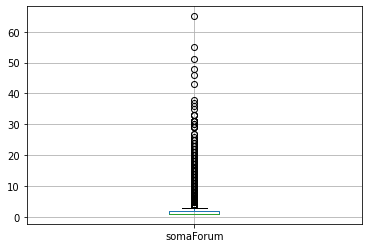

In [16]:
teste.boxplot(column='somaForum', return_type='axes')

In [17]:
teste['somaForum'].describe()

count    24059.000000
mean         1.787190
std          2.193431
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         65.000000
Name: somaForum, dtype: float64

In [18]:
activeYears = users[users['uuid'].isin(teste['user_uuid'])]
createdDates= [pd.to_datetime(d) for d in activeYears['createdAt']]
activeYears['yearsActive'] = [relativedelta(datetime.now(), d).years for d in createdDates]
activeYears['creationDate'] = [i for i in createdDates]
activeYears.drop(['createdAt','special_flagged'],axis=1,inplace=True)
activeYears.head()

<ipython-input-18-6bbc223fbf2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activeYears['yearsActive'] = [relativedelta(datetime.now(), d).years for d in createdDates]
<ipython-input-18-6bbc223fbf2b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activeYears['creationDate'] = [i for i in createdDates]
C:\Users\gabriel\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

,uuid,yearsActive,creationDate
3,129570,9,2011-08-19
64,55367,9,2011-09-22
69,41377,9,2011-09-22
77,124499,9,2011-09-23
123,41067,9,2011-10-10


In [19]:
avgPosts = teste.merge(activeYears,left_on='user_uuid',right_on='uuid')
avgPosts.drop(['uuid'],axis=1,inplace=True)
avgPosts['moment'] = pd.to_datetime(avgPosts['moment'])
avgPosts['creationDate'] = pd.to_datetime(avgPosts['creationDate'])
avgPosts['avg'] = (avgPosts['somaEx']+avgPosts['somaForum'])/(avgPosts['moment'].dt.year - avgPosts['creationDate'].dt.year)
avgPosts.replace([np.inf, -np.inf], np.nan, inplace=True) 
avgPosts.dropna(inplace=True) 
  

avgPosts.head()

,user_uuid,moment,somaForum,somaEx,yearsActive,creationDate,avg
26,13258,2017-01-05,5,5,4,2016-07-22,10.0
27,13258,2017-01-06,7,6,4,2016-07-22,13.0
28,13258,2017-01-07,7,11,4,2016-07-22,18.0
29,13258,2017-01-09,11,14,4,2016-07-22,25.0
30,13258,2017-01-10,16,12,4,2016-07-22,28.0


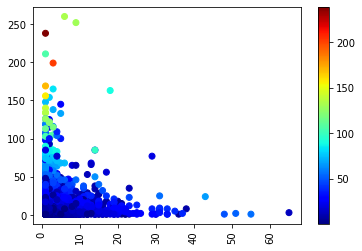

In [20]:
plt.scatter(x=avgPosts['somaForum'],y=avgPosts['somaEx'],c=avgPosts['avg'],cmap='jet')
plt.xticks(rotation='vertical')
plt.colorbar()
plt.show()

Com o plot de Forum X Exercícios acima, podemos perceber que não há uma correlação entre a atividade dos alunos nos fóruns e exercícios. Ademais, uma característica importante se tornou visível: conforme um aluno aumenta seu volume de atividades na plataforma, a tendência é que este se especialize em exercícios OU perguntas no fórum, nunca os dois juntos.

Relação entre tempo gasto em vídeo e quantidade de exercícios

In [21]:
tasksEx = logs.copy()

tasksEx = tasksEx[tasksEx.kind!='FORUM_SOLVED']
tasksEx = tasksEx[tasksEx.kind!='FORUM_POSTED']
tasksEx = tasksEx[tasksEx.kind!='SUGGESTION_APPROVED']

tasksEx.drop(['iterable_uuid'],axis=1,inplace=True)
tasksEx['somaEx'] = tasksEx.groupby(['user_uuid','moment'])['kind'].transform('count')
tasksEx.drop_duplicates(subset=['user_uuid','moment'],inplace=True)
tasksEx.drop(['kind'],axis=1,inplace=True)
tasksEx = tasksEx.merge(tasks[['duration','uuid']],left_on='user_uuid',right_on='uuid')
tasksEx.drop(['user_uuid'],axis=1,inplace=True)
tasksEx.head()

,moment,somaEx,duration,uuid
0,2016-09-12,47,192,57928
1,2016-09-13,13,192,57928
2,2016-09-14,28,192,57928
3,2016-09-15,6,192,57928
4,2016-09-16,8,192,57928


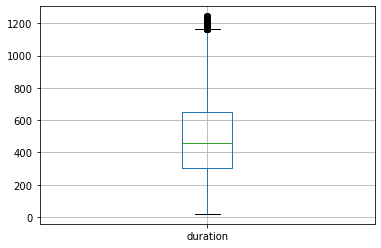

In [22]:
tasksEx = tasksEx[(tasksEx['duration'] > 0) & (tasksEx['duration'] < 1250) ]
tasksEx.boxplot(column='duration',return_type='axes')

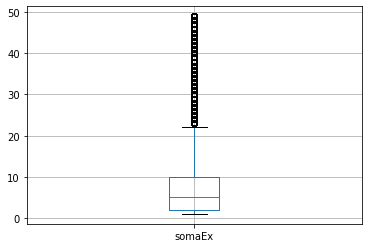

In [23]:
tasksEx = tasksEx[tasksEx['somaEx'] < 50]
tasksEx.boxplot(column='somaEx',return_type='axes')

In [24]:
tasksForumEx = tasksEx.merge(logsForum,left_on=['uuid','moment'],right_on=['user_uuid','moment'])
tasksForumEx.drop(['user_uuid'],axis=1,inplace=True)

In [25]:
tasksForumEx.head()

,moment,somaEx,duration,uuid,somaForum
0,2016-09-13,13,192,57928,1
1,2018-08-17,31,192,57928,1
2,2016-09-13,19,85,16791,1
3,2017-02-14,7,85,16791,1
4,2016-09-20,28,310,23131,1


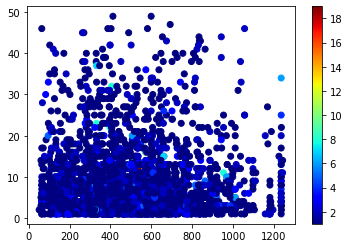

In [26]:
dates= [pd.to_datetime(d) for d in tasksForumEx['moment']]
plt.scatter(x=tasksForumEx['duration'],y=tasksForumEx['somaEx'],c=tasksForumEx['somaForum'],cmap='jet')
plt.colorbar()
plt.show()

Corroborando com o que foi dito anteriormente, aqui vemos, mais uma vez, a ausência de relação entre 

In [29]:
tasksForumEx.corr()

,somaEx,duration,uuid,somaForum
somaEx,1.000000,-0.022210,0.052386,-0.033022
duration,-0.022210,1.000000,0.036036,0.018567
uuid,0.052386,0.036036,1.000000,-0.043287
somaForum,-0.033022,0.018567,-0.043287,1.000000


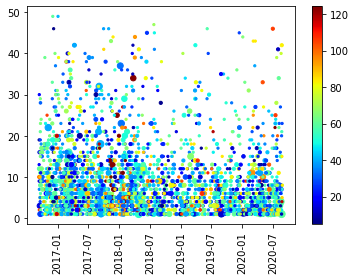

In [30]:
dates= [pd.to_datetime(d) for d in tasksForumEx['moment']]
du= [d/10 for d in tasksForumEx['duration']]
plt.scatter(x=dates,y=tasksForumEx['somaEx'],s=tasksForumEx['somaForum']*5,c=du,cmap='jet')
plt.xticks(rotation='vertical')
plt.colorbar()
plt.show()

Neste plot, percebemos algo interessante: o tempo que o aluno gasta em vídeo, representado no gráfico pela cor dos pontos, não tem correlação nem com a quantidade de exercícios feitos pelo aluno, nem com a atividade nos fóruns do mesmo. Ou seja, um aluno que assiste muitas aulas na plataforma não irá, necessáriamente, fazer muitos exercícios ou ser muito ativo nos fóruns online.

In [31]:
scores = avgPosts.copy()
scores['somaForum'] = scores.groupby('user_uuid')['somaForum'].transform('sum')
scores['somaEx'] = scores.groupby('user_uuid')['somaEx'].transform('sum')
scores['avg'] = (scores['somaForum']+scores['somaEx'])/(scores['yearsActive'])
scores.drop_duplicates(subset='user_uuid',inplace=True)
dscores = scores.merge(tasks,left_on='user_uuid',right_on='uuid')
dscores['duration'] = dscores.groupby('user_uuid')['duration'].transform('sum')
dscores.drop(['kind','status','course_uuid','uuid','createdAt'],axis=1,inplace=True)
dscores.head()

,user_uuid,moment,somaForum,somaEx,yearsActive,creationDate,avg,duration
0,13258,2017-01-05,184,263,4,2016-07-22,111.75,0
1,53284,2016-09-13,2,10,6,2014-01-09,2.00,981
2,27744,2017-11-15,1,15,4,2016-09-06,4.00,151
3,16791,2017-02-14,1,7,4,2016-08-01,2.00,85
4,57928,2018-08-17,1,31,4,2016-09-10,8.00,192


In [32]:
selectRegs = regs[['user_uuid','course_uuid']]
selectRegs = selectRegs[selectRegs['user_uuid'].isin(dscores['user_uuid'])]
testeScore = dscores.merge(selectRegs,left_on='user_uuid',right_on='user_uuid')
testeScore['courses'] = testeScore.groupby('user_uuid')['course_uuid'].transform('count')
testeScore.drop_duplicates(subset='user_uuid',inplace=True)
testeScore.head()

,user_uuid,moment,somaForum,somaEx,yearsActive,creationDate,avg,duration,course_uuid,courses
0,13258,2017-01-05,184,263,4,2016-07-22,111.75,0,801,28
28,53284,2016-09-13,2,10,6,2014-01-09,2.00,981,588,42
70,27744,2017-11-15,1,15,4,2016-09-06,4.00,151,843,16
86,16791,2017-02-14,1,7,4,2016-08-01,2.00,85,56,22
108,57928,2018-08-17,1,31,4,2016-09-10,8.00,192,375,7


Aqui, desenvolvemos uma metrica de score para os alunos

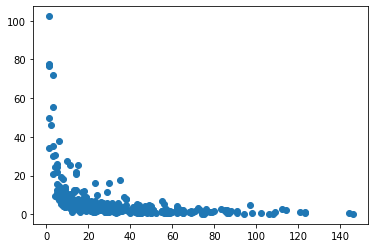

In [92]:
testeScore = testeScore[(testeScore['avg']<50) & (testeScore['avg']>0)]
testeScore = testeScore[testeScore['courses']>0]
testeScore = testeScore[(testeScore['duration']<1200) & (testeScore['duration']>0)]
normalEx = testeScore['somaEx']/testeScore['somaEx'].mean()
normalForum = testeScore['somaForum']/testeScore['somaForum'].mean()
normalDuration = testeScore['duration']/testeScore['duration'].mean()
normalCourses = testeScore['courses']/testeScore['courses'].mean()
testeScore['score'] = (normalEx+normalForum+normalDuration)/normalCourses
plt.scatter(x=testeScore['courses'],y=testeScore['score'])
plt.show()

Após estabelecida a métrica, veremos dados a respeito de cada um dos quartis de pontuação

In [129]:
logFreq = logs[['user_uuid','moment']]
logFreq['entries'] = logFreq.groupby(['user_uuid','moment'])['moment'].transform('count')
logFreq.drop_duplicates(subset=['user_uuid','moment'],inplace=True)
logFreq['stddev'] = logFreq.groupby(['user_uuid'])['entries'].transform('var')
logFreq.head(10)

<ipython-input-129-e6383345b543>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logFreq['entries'] = logFreq.groupby(['user_uuid','moment'])['moment'].transform('count')
<ipython-input-129-e6383345b543>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logFreq.drop_duplicates(subset=['user_uuid','moment'],inplace=True)
<ipython-input-129-e6383345b543>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,user_uuid,moment,entries,stddev
0,57928,2016-09-12,47,976.858974
1,73719,2016-09-12,5,55.314407
2,38957,2016-09-12,2,30.077558
3,59788,2016-09-12,28,90.730488
5,61315,2016-09-12,12,10.500000
7,15131,2016-09-12,14,40.703815
8,4717,2016-09-12,3,276.800000
9,50945,2016-09-12,10,34.905138
11,100329,2016-09-12,37,92.705426
12,41837,2016-09-12,11,744.673831


In [150]:
scoreFreq = testeScore.merge(logFreq[['user_uuid','stddev','entries']],left_on='user_uuid',right_on='user_uuid')
scoreFreq['entries'] = scoreFreq.groupby(['user_uuid'])['entries'].transform('sum')
scoreFreq.drop_duplicates(subset='user_uuid',inplace=True)
scoreFreq.drop(['course_uuid'],axis=1,inplace=True)

In [151]:
scoreFreq.head()

,user_uuid,moment,somaForum,somaEx,yearsActive,creationDate,avg,duration,courses,score,target,stddev,entries
0,53284,2016-09-13,2,10,6,2014-01-09,2.0,981,42,2.477376,3,114.612987,416
56,27744,2017-11-15,1,15,4,2016-09-06,4.0,151,16,2.934830,1,21.509801,903
212,16791,2017-02-14,1,7,4,2016-08-01,2.0,85,22,1.294749,1,78.987805,357
254,57928,2018-08-17,1,31,4,2016-09-10,8.0,192,7,11.118681,3,976.858974,361
267,6338,2016-09-14,1,2,5,2015-06-27,0.6,1087,15,5.770098,3,21.362637,82


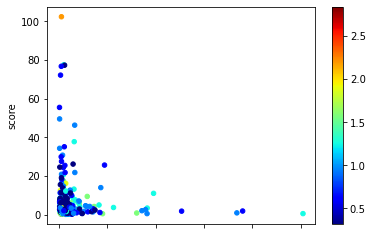

In [154]:
scoreFreq.plot(kind='scatter',x='stddev',y='score',colormap='jet',c=scoreFreq.yearsActive/scoreFreq.yearsActive.mean())
plt.show()

Iniciar aqui a seleção dos 25% mais ativos, utilizando o critério de mais tempo assistindo vídeos na plataforma:

In [38]:
timeWatched = tasks[['duration','uuid']]
#remover 0 minutos (ruido)
timeWatched = timeWatched[(timeWatched['duration'] > 0) & (timeWatched['duration'] < 1500)]
timeWatched.sort_values(by='duration', ascending=False).head()

,duration,uuid
22063,1497,4298
35342,1496,49765
24124,1496,47443
39779,1490,12482
2646,1489,61167


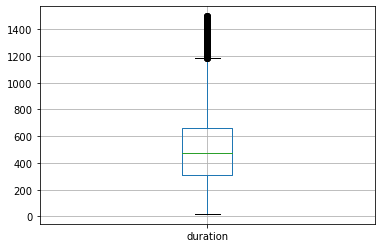

In [39]:
timeWatched.boxplot(column='duration', return_type='axes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001420C3E08E0>]],
      dtype=object)

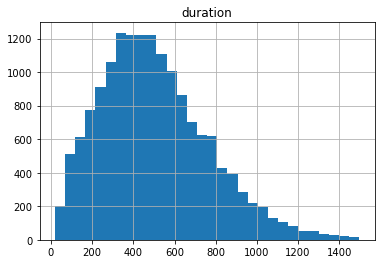

In [40]:
timeWatched.hist(column='duration',bins=30)

In [41]:
#pegar os top 25% com mais tempo assistido
top25 = timeWatched.sort_values(by='duration', ascending=False).head(int(len(timeWatched)*0.25))
top25.head()

,duration,uuid
22063,1497,4298
35342,1496,49765
24124,1496,47443
39779,1490,12482
2646,1489,61167


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001420C484430>]],
      dtype=object)

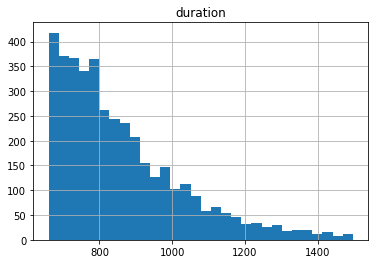

In [42]:
top25.hist(column='duration', bins=30)

Acima, temos a distribuição do tempo em que os alunos do quartil superior gastam na plataforma (Tempo em minutos X quantidade de alunos)

In [43]:
statuses = top25.merge(regs, left_on='uuid',right_on='user_uuid')
statuses.head()

,duration,uuid,user_uuid,course_uuid,createdAt,finishedAt,lastAccessDate,currentState
0,1496,47443,47443,1012,2017-02-23 16:16:27,NaN,2017-05-03 22:38:01,IN_PROGRESS
1,1496,47443,47443,1039,2017-02-23 16:55:09,2017-03-12 22:31:50,2017-03-12 22:31:42,IN_PROGRESS
2,1496,47443,47443,1057,2017-02-23 22:00:18,2017-10-10 21:43:44,2017-10-10 21:44:39,IN_PROGRESS
3,1496,47443,47443,983,2017-02-23 22:00:55,2017-10-16 20:17:24,2018-01-08 20:26:25,IN_PROGRESS
4,1496,47443,47443,1002,2017-02-23 22:02:39,2017-02-24 00:26:42,2017-02-24 00:26:35,IN_PROGRESS


In [44]:
statuses = statuses[statuses.currentState!='NOT_VISIBLE']
statuses = statuses[statuses.currentState!='BOOKMARKED']

Aqui, fazemos a remoção de estados de curso irrelevantes para nossa análise, deixando apenas IN_PROGRESS e PAUSED a serem analisados

In [45]:
#curso completado -> com data e in_progress // curso pausado -> resto
statuses['completion'] = np.where((statuses['currentState']=='IN_PROGRESS') & (statuses['finishedAt'].notna()), 'completed', 'paused')

In [46]:
statuses.drop(['duration'],axis=1,inplace=True)
statuses.head()

,uuid,user_uuid,course_uuid,createdAt,finishedAt,lastAccessDate,currentState,completion
0,47443,47443,1012,2017-02-23 16:16:27,NaN,2017-05-03 22:38:01,IN_PROGRESS,paused
1,47443,47443,1039,2017-02-23 16:55:09,2017-03-12 22:31:50,2017-03-12 22:31:42,IN_PROGRESS,completed
2,47443,47443,1057,2017-02-23 22:00:18,2017-10-10 21:43:44,2017-10-10 21:44:39,IN_PROGRESS,completed
3,47443,47443,983,2017-02-23 22:00:55,2017-10-16 20:17:24,2018-01-08 20:26:25,IN_PROGRESS,completed
4,47443,47443,1002,2017-02-23 22:02:39,2017-02-24 00:26:42,2017-02-24 00:26:35,IN_PROGRESS,completed


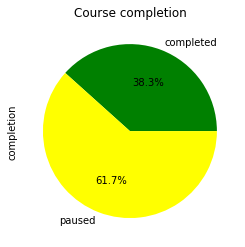

In [47]:
statuses.groupby('completion')['completion'].count().plot.pie(colors = ['green','yellow'], autopct='%1.1f%%',title='Course completion',)

In [48]:
statuses.groupby('completion')['completion'].count()

completion
completed     8405
paused       13512
Name: completion, dtype: int64

Pelo gráfico, percebe-se que a maioria dos alunos os quais consideramos "os mais estudiosos" não completam seus cursos, mas sim os pausam em pontos arbitrários, sem necessáriamente haver um critério

In [49]:
courses.head()

,createdAt,level,publicatedAt,totalVideoTime,subCategory_id,situation,isProject,removedAt,uuid,substitute_uuid
0,2011-09-22,1,2011-09-22,51,30,PUBLISHED,0,NaN,588,NaN
1,2011-10-27,5,2011-10-27,72,21,PUBLISHED,0,NaN,840,NaN
2,2012-02-15,1,2012-02-15,112,1,PUBLISHED,0,NaN,764,NaN
3,2012-03-07,5,2012-03-07,83,21,PUBLISHED,0,NaN,720,NaN
4,2012-05-29,1,2012-05-29,70,48,PUBLISHED,0,NaN,937,NaN


In [50]:
courses.groupby('level')['level'].count()

level
1     664
5     375
10     50
Name: level, dtype: int64

In [51]:
top25_courses = top25.merge(tasks, left_on='uuid',right_on='uuid')
top25_courses = top25_courses.merge(courses, left_on='course_uuid',right_on='uuid')
top25_courses.drop(['duration_x','duration_y','createdAt_x','createdAt_y','uuid_y'],axis=1,inplace=True)
top25_courses.head()

,uuid_x,kind,status,course_uuid,level,publicatedAt,totalVideoTime,subCategory_id,situation,isProject,removedAt,substitute_uuid
0,4298,VIDEO,ACTIVE,591,1,2018-04-06,0,107,PUBLISHED,0,NaN,NaN
1,18189,VIDEO,ACTIVE,591,1,2018-04-06,0,107,PUBLISHED,0,NaN,NaN
2,33089,VIDEO,ACTIVE,591,1,2018-04-06,0,107,PUBLISHED,0,NaN,NaN
3,26139,VIDEO,ACTIVE,591,1,2018-04-06,0,107,PUBLISHED,0,NaN,NaN
4,2363,VIDEO,ACTIVE,591,1,2018-04-06,0,107,PUBLISHED,0,NaN,NaN


In [52]:
top25_courses.groupby('level')['level'].count()

level
1     2350
5     1463
10     175
Name: level, dtype: int64

Temos abaixo o gráfico que ilustra uma predominância de cursos considerados "mais fáceis" dentre esse público.

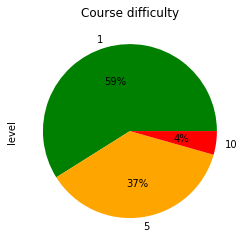

In [53]:
top25_courses.groupby('level')['level'].count().plot.pie(colors = ['green','orange','red'], autopct='%1.0f%%',title='Course difficulty')

In [54]:
teste = statuses.merge(top25_courses, left_on='uuid',right_on='uuid_x')
teste.drop(['uuid_x', 'course_uuid_y'],axis=1,inplace=True)
teste['completion'] = teste['completion'].replace('completed', 1)
teste['completion'] = teste['completion'].replace('paused', 0)
teste['courseCount'] = teste.groupby('uuid')['course_uuid_x'].transform('count')
teste['completionRate'] = 100*teste.groupby(by=['uuid'])['completion'].transform('sum')/teste['courseCount']
teste = teste[['uuid','completionRate','courseCount']]
teste.drop_duplicates(subset=['uuid'],keep='first',inplace=True)
teste.head()

,uuid,completionRate,courseCount
0,47443,64.864865,37
37,12482,66.666667,3
40,61167,60.000000,5
45,24052,0.000000,2
47,19775,38.709677,31


Finalmente, temos abaixo uma distribuição ta taxa de conclusão dos cursos entre os 25% mais ativos na plataforma.

Text(0.5, 1.0, 'Taxa de completude dos cursos')

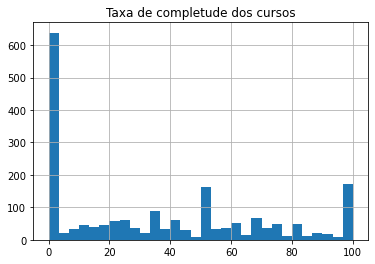

In [55]:
teste.hist(column='completionRate',bins=30)
plt.title('Taxa de completude dos cursos')

Percebemos aqui que, em par com o que já foi comentado anteriormente, a grande maioria dos alunos analisados não completa nem 20% dos cursos em que se inscreve.